 # **Challenge Telecom-X**

## **Extracción de datos en formato JSON.**

In [1]:
import pandas as pd

# Cargar y aplanar el JSON
telecom = pd.read_json("/content/TelecomX_Data.json")
telecom_flat = pd.json_normalize(telecom.to_dict(orient='records'))

# Renombrar columnas para mayor legibilidad
telecom_flat.columns = telecom_flat.columns.str.replace('.', '_').str.lower()


In [2]:
telecom_flat.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
telecom_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

## **Transformación de datos**

### **Limpieza por columnas**

#### **customerID**

In [4]:
telecom_flat['customerid'] = telecom_flat['customerid'].astype(str).str.strip()

#### **churn**

In [5]:
telecom_flat['churn'] = telecom_flat['churn'].str.strip().str.title()
telecom_flat = telecom_flat[telecom_flat['churn'].isin(['Yes', 'No'])]  # quitar vacíos

#### **Gender**

In [6]:
telecom_flat['customer_gender'] = telecom_flat['customer_gender'].str.strip().str.title()

#### **SeniorCitizen**

In [7]:
telecom_flat['customer_seniorcitizen'] = telecom_flat['customer_seniorcitizen'].astype(int)

#### **Partner y Dependents**

In [8]:
telecom_flat['customer_tenure'] = pd.to_numeric(telecom_flat['customer_tenure'], errors='coerce')

#### **tenure**

In [9]:
telecom_flat['customer_tenure'] = pd.to_numeric(telecom_flat['customer_tenure'], errors='coerce')

#### **Phoneservice y Multiplelines**

In [10]:
telecom_flat['phone_phoneservice'] = telecom_flat['phone_phoneservice'].str.strip().str.title()
telecom_flat['phone_multiplelines'] = telecom_flat['phone_multiplelines'].str.strip().str.title()

#### **Servicios de internet**

In [11]:
cols_internet = [
    'internet_internetservice', 'internet_onlinesecurity', 'internet_onlinebackup',
    'internet_deviceprotection', 'internet_techsupport',
    'internet_streamingtv', 'internet_streamingmovies'
]
for col in cols_internet:
    telecom_flat[col] = telecom_flat[col].str.strip().str.title()

#### **Contract, Paperlessbilling, Paymentmethod**

In [12]:
telecom_flat['account_contract'] = telecom_flat['account_contract'].str.strip().str.title()
telecom_flat['account_paperlessbilling'] = telecom_flat['account_paperlessbilling'].str.strip().str.title()
telecom_flat['account_paymentmethod'] = telecom_flat['account_paymentmethod'].str.strip().str.title()

#### **Charges_Monthly y Charges_Total**

In [13]:
telecom_flat['account_charges_monthly'] = pd.to_numeric(telecom_flat['account_charges_monthly'], errors='coerce')
telecom_flat['account_charges_total'] = pd.to_numeric(telecom_flat['account_charges_total'], errors='coerce')

#### **Eliminar registros con datos faltantes críticos**

In [14]:
# Por ejemplo, si total charges o tenure está vacío, no sirve para análisis
telecom_flat.dropna(subset=['account_charges_total', 'customer_tenure'], inplace=True)


#### **Resetear índice**

In [15]:
telecom_flat.reset_index(drop=True, inplace=True)
telecom_flat.tail()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,Dsl,...,No,No,Yes,No,No,One Year,No,Mailed Check,55.15,742.90
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber Optic,...,No,No,No,No,Yes,Month-To-Month,Yes,Electronic Check,85.10,1873.70
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,Dsl,...,Yes,No,No,No,No,Month-To-Month,Yes,Mailed Check,50.30,92.75
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,Dsl,...,No,Yes,Yes,No,Yes,Two Year,No,Mailed Check,67.85,4627.65
7031,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No Phone Service,Dsl,...,Yes,Yes,No,Yes,Yes,Two Year,No,Electronic Check,59.00,3707.60


#### **Creación de columna "Cuentas_Diarias"**

Para crear la columna "Cuentas_Diarias" a partir de la facturación mensual (account_charges_monthly), simplemente vamos a dividir ese valor entre 30, como estimación del promedio de días por mes.

In [16]:
# Crear la columna Cuentas_Diarias como facturación mensual / 30
telecom_flat['cuentas_diarias'] = telecom_flat['account_charges_monthly'] / 30
# Ver las primeras filas para revisar la nueva columna
telecom_flat[['account_charges_monthly', 'cuentas_diarias']].head()

,account_charges_monthly,cuentas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


### **Estandarización y transformación de datos**

#### **1. Conversión de valores "Yes"/"No" a binarios (1 y 0)**

Aplicamos esto a todas las columnas que contienen respuestas de tipo sí/no:

In [17]:
# Lista de columnas booleanas
binarias = [
    'churn', 'customer_partner', 'customer_dependents',
    'phone_phoneservice', 'account_paperlessbilling'
]

# Añadir columnas binarias de servicios opcionales
servicios = [
    'internet_onlinesecurity', 'internet_onlinebackup',
    'internet_deviceprotection', 'internet_techsupport',
    'internet_streamingtv', 'internet_streamingmovies',
    'internet_internetservice', 'phone_multiplelines'
]

# Convertir "Yes"/"No" → 1/0
for col in binarias + servicios:
    telecom_flat[col] = telecom_flat[col].map({'Yes': 1, 'No': 0})


#### **2. Conversión de "SeniorCitizen" a tipo categórico con nombre claro**

In [18]:
telecom_flat['es_adulto_mayor'] = telecom_flat['customer_seniorcitizen'].map({1: 'Sí', 0: 'No'})

#### **3. Renombrar columnas a nombres en español más comprensibles**

In [19]:
telecom_flat.rename(columns={
    'customer_gender': 'genero',
    'customer_partner': 'tiene_pareja',
    'customer_dependents': 'tiene_dependientes',
    'customer_tenure': 'meses_contratado',
    'phone_phoneservice': 'servicio_telefonico',
    'phone_multiplelines': 'multiples_lineas',
    'internet_internetservice': 'tipo_internet',
    'internet_onlinesecurity': 'seguridad_online',
    'internet_onlinebackup': 'respaldo_online',
    'internet_deviceprotection': 'proteccion_dispositivo',
    'internet_techsupport': 'soporte_tecnico',
    'internet_streamingtv': 'tv_streaming',
    'internet_streamingmovies': 'peliculas_streaming',
    'account_contract': 'tipo_contrato',
    'account_paperlessbilling': 'factura_digital',
    'account_paymentmethod': 'metodo_pago',
    'account_charges_monthly': 'cargo_mensual',
    'account_charges_total': 'cargo_total',
    'cuentas_diarias': 'cargo_diario',
}, inplace=True)

#### **4. Estandarizar texto categórico (género, contrato, método de pago, tipo de internet)**

In [20]:
cat_cols = ['genero', 'tipo_internet', 'tipo_contrato', 'metodo_pago']

for col in cat_cols:
    telecom_flat[col] = telecom_flat[col].astype(str).str.lower().str.replace('-', ' ', regex=False).str.strip()

#### **5.Resultado final (verificación rápida)**

In [21]:
telecom_flat.head()
telecom_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerid              7032 non-null   object 
 1   churn                   7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   customer_seniorcitizen  7032 non-null   int64  
 4   tiene_pareja            7032 non-null   int64  
 5   tiene_dependientes      7032 non-null   int64  
 6   meses_contratado        7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   int64  
 8   multiples_lineas        6352 non-null   float64
 9   tipo_internet           7032 non-null   object 
 10  seguridad_online        5512 non-null   float64
 11  respaldo_online         5512 non-null   float64
 12  proteccion_dispositivo  5512 non-null   float64
 13  soporte_tecnico         5512 non-null   float64
 14  tv_streaming            5512 non-null   

#### ****Eliminación de  columnas que no aportan valor al análisis o a los modelos predictivos****

In [22]:
import pandas as pd
import json

# Cargar el JSON
with open('TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir el JSON a un DataFrame plano
df = pd.json_normalize(data)

# Ver columnas iniciales
print("Columnas iniciales:", df.columns.tolist())

# Eliminar identificador único
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Eliminar columnas con solo un valor (poca o nula varianza)
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=low_variance_cols, inplace=True)

# Mostrar columnas eliminadas y las que quedan
print("Columnas eliminadas por poca varianza:", low_variance_cols)
print("Columnas finales:", df.columns.tolist())

Columnas iniciales: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Columnas eliminadas por poca varianza: []
Columnas finales: ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charg

#### ****Formato en CSV ya tratado****

In [23]:
import pandas as pd

Telecom_nuevo = pd.read_csv('/content/TelecomX_Limpio.csv')

In [24]:
Telecom_nuevo.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [25]:
Telecom_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   object 
 1   customer.gender            7267 non-null   object 
 2   customer.SeniorCitizen     7267 non-null   int64  
 3   customer.Partner           7267 non-null   object 
 4   customer.Dependents        7267 non-null   object 
 5   customer.tenure            7267 non-null   int64  
 6   phone.PhoneService         7267 non-null   object 
 7   phone.MultipleLines        7267 non-null   object 
 8   internet.InternetService   7267 non-null   object 
 9   internet.OnlineSecurity    7267 non-null   object 
 10  internet.OnlineBackup      7267 non-null   object 
 11  internet.DeviceProtection  7267 non-null   object 
 12  internet.TechSupport       7267 non-null   object 
 13  internet.StreamingTV       7267 non-null   objec

#### *****Código actualizado para limpiar y codificar*****

In [26]:
import pandas as pd
import json

# Cargar el JSON
with open('/content/TelecomX_Data.json') as f:
    data = json.load(f)

# Convertir el JSON a un DataFrame plano
df = pd.json_normalize(data)

# Ver columnas iniciales
print("Columnas iniciales:", df.columns.tolist())

# Eliminar identificador único
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)

# Eliminar columnas con solo un valor (poca o nula varianza)
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=low_variance_cols, inplace=True)

# Mostrar columnas eliminadas y las que quedan
print("Columnas eliminadas por poca varianza:", low_variance_cols)
print("Columnas finales:", df.columns.tolist())

# Save the cleaned dataframe to a CSV file
df.to_csv('/content/TelecomX_Limpio.csv', index=False) # Add this line to save the file

Columnas iniciales: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Columnas eliminadas por poca varianza: []
Columnas finales: ['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charg

In [27]:
import pandas as pd

# Cargar datos
df = pd.read_csv('/content/TelecomX_Limpio.csv')

# Convertir columna 'account.Charges.Total' a numérica (forzar errores a NaN)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar One-Hot Encoding
df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Guardar CSV limpio y listo para Machine Learning
df_codificado.to_csv('/content/TelecomX_Preparado.csv', index=False)

# Mostrar un resumen final
df_codificado.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [28]:
# Paso 1: Importar librerías necesarias
import pandas as pd

# Paso 2: Cargar el archivo CSV limpio
ruta = '/content/TelecomX_Limpio.csv'  # Asegúrate de subir el archivo a tu entorno de Colab
df = pd.read_csv(ruta)

# Paso 3: Corregir columna 'account.Charges.Total' (convertir a numérico)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Paso 4: Identificar columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

# Paso 5: Aplicar One-Hot Encoding
df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Paso 6: Guardar el nuevo archivo procesado
df_codificado.to_csv('/content/TelecomX_Preparado.csv', index=False)

# Paso 7: Mostrar las primeras filas del DataFrame final
df_codificado.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,False,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,True,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True


##### ****ENCODING****

## **Verificación de la Proporción de Cancelación (Churn)**

#### ****calcular proporción de Churn****

Conteo de clases (Churn):
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases (Churn):
 Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


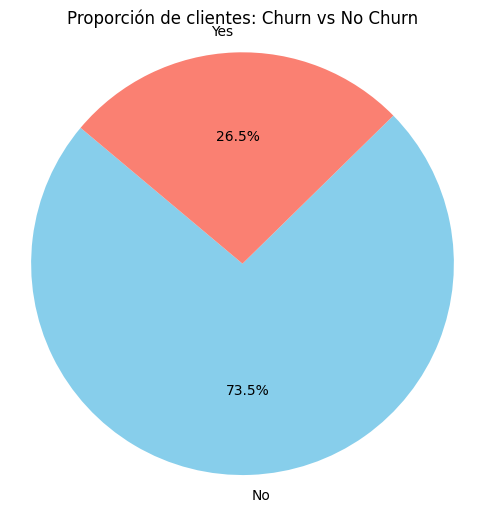

In [29]:
# Paso 1: Contar la cantidad de clientes por clase (Churn)
conteo_churn = df['Churn'].value_counts()

# Paso 2: Calcular proporciones
proporcion_churn = conteo_churn / conteo_churn.sum()

# Paso 3: Mostrar los resultados
print("Conteo de clases (Churn):\n", conteo_churn)
print("\nProporción de clases (Churn):\n", proporcion_churn)

# Paso 4: Visualizar con gráfico de torta
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(conteo_churn, labels=conteo_churn.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Proporción de clientes: Churn vs No Churn")
plt.axis('equal')
plt.show()

## **Balanceo de Clases**

#### ****Paso 1: Verificar el desbalanceo****

In [30]:
# Verificar desbalanceo de clases
conteo_churn = df['Churn'].value_counts()
proporcion_churn = conteo_churn / conteo_churn.sum()

print("Conteo de clases:")
print(conteo_churn)
print("\nProporción de clases:")
print(proporcion_churn)

Conteo de clases:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases:
Churn
No     0.73463
Yes    0.26537
Name: count, dtype: float64


#### ****Paso 2: Preparar datos para balanceo****

In [31]:
# Codificar la variable objetivo (si aún no está en 0 y 1)
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [32]:
## Separar variables predictoras (X) y la variable objetivo (y):
X = df.drop('Churn', axis=1)
y = df['Churn']

#### ****Paso 3A: Oversampling con SMOTE****

In [33]:
# Instalar librería si no está instalada
!pip install imbalanced-learn

# Cargar el archivo CSV con los datos ya codificados
df_codificado = pd.read_csv('/content/TelecomX_Preparado.csv')

# Eliminar filas con values nulos en la variable objetivo 'Churn_Yes'
df_codificado.dropna(subset=['Churn_Yes'], inplace=True)

# Separar variables predictoras (X) y la variable objetivo (y):
X = df_codificado.drop('Churn_Yes', axis=1)
y = df_codificado['Churn_Yes']

# Eliminar filas con valores nulos en las features (X)
X.dropna(inplace=True)

# Asegurarse de que X e y tienen el mismo número de filas después de dropping NaNs
y = y.loc[X.index]


# Aplicar SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

# Verificar nuevo balance
print("Distribución después de SMOTE:\n", y_res.value_counts())

Distribución después de SMOTE:
 Churn_Yes
False    5387
True     5387
Name: count, dtype: int64


#### ****Paso 3B: Undersampling (alternativa)****

In [34]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

X_res, y_res = undersampler.fit_resample(X, y)

# Verificar nuevo balance
print("Distribución después de Undersampling:\n", y_res.value_counts())

Distribución después de Undersampling:
 Churn_Yes
False    1869
True     1869
Name: count, dtype: int64


## **Normalización o Estandarización**

In [35]:
# SMOTE and scaling (StandardScaler)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd # Import pandas

# Load the already encoded data
df_codificado = pd.read_csv('/content/TelecomX_Preparado.csv')

# Drop rows with nulls in the target variable 'Churn_Yes'
df_codificado.dropna(subset=['Churn_Yes'], inplace=True)

# Separate features (X) and target (y)
X = df_codificado.drop('Churn_Yes', axis=1)
y = df_codificado['Churn_Yes']

# Drop rows with null values in the features (X) - SMOTE cannot handle NaNs
X.dropna(inplace=True)

# Ensure X and y have the same number of rows after dropping NaNs
y = y.loc[X.index]

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the resampled data for distance-based models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

print("Shape of X_scaled after SMOTE and Scaling:", X_scaled.shape)

Shape of X_scaled after SMOTE and Scaling: (10774, 30)


#### ***1. Entrenar un modelo SVM (requiere escalado)***

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir datos en entrenamiento y prueba (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

# Crear y entrenar el modelo SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Predicciones
y_pred = svm_model.predict(X_test)

# Evaluación
print("Accuracy SVM:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy SVM: 0.8311166099597896

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.84      0.83      0.83      1624
        True       0.83      0.84      0.83      1609

    accuracy                           0.83      3233
   macro avg       0.83      0.83      0.83      3233
weighted avg       0.83      0.83      0.83      3233


Matriz de Confusión:
 [[1341  283]
 [ 263 1346]]


#### ***2. Entrenar un modelo Random Forest (sin escalar)***

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Dividir datos originales balanceados, sin escalar
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Crear y entrenar Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predicciones
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluación
print("Accuracy Random Forest:", accuracy_score(y_test_rf, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test_rf, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_rf, y_pred_rf))

Accuracy Random Forest: 0.8484379832972472

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.85      0.84      0.85      1624
        True       0.84      0.86      0.85      1609

    accuracy                           0.85      3233
   macro avg       0.85      0.85      0.85      3233
weighted avg       0.85      0.85      0.85      3233


Matriz de Confusión:
 [[1367  257]
 [ 233 1376]]


In [38]:
!pip install imbalanced-learn xgboost

#### ***1. Modelo con XGBoost (sin escalar)***

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir datos balanceados (no escalados)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Entrenar XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predicciones
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Evaluación
print("Accuracy XGBoost:", accuracy_score(y_test_xgb, y_pred_xgb))
print("\nReporte de Clasificación:\n", classification_report(y_test_xgb, y_pred_xgb))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_xgb, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:15:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy XGBoost: 0.8475100525827405

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.85      0.84      0.85      1624
        True       0.84      0.85      0.85      1609

    accuracy                           0.85      3233
   macro avg       0.85      0.85      0.85      3233
weighted avg       0.85      0.85      0.85      3233


Matriz de Confusión:
 [[1367  257]
 [ 236 1373]]


#### ***2. Modelo con Red Neuronal (MLPClassifier) (requiere escalado)***


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir datos escalados
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

# Entrenar red neuronal básica
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train_mlp, y_train_mlp)

# Predicciones
y_pred_mlp = mlp_model.predict(X_test_mlp)

# Evaluación
print("Accuracy MLP:", accuracy_score(y_test_mlp, y_pred_mlp))
print("\nReporte de Clasificación:\n", classification_report(y_test_mlp, y_pred_mlp))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test_mlp, y_pred_mlp))

Accuracy MLP: 0.816888339004021

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.82      0.81      0.82      1624
        True       0.81      0.82      0.82      1609

    accuracy                           0.82      3233
   macro avg       0.82      0.82      0.82      3233
weighted avg       0.82      0.82      0.82      3233


Matriz de Confusión:
 [[1315  309]
 [ 283 1326]]


## *Correlación y Selección de Variables*

#### ***Análisis de Correlación***

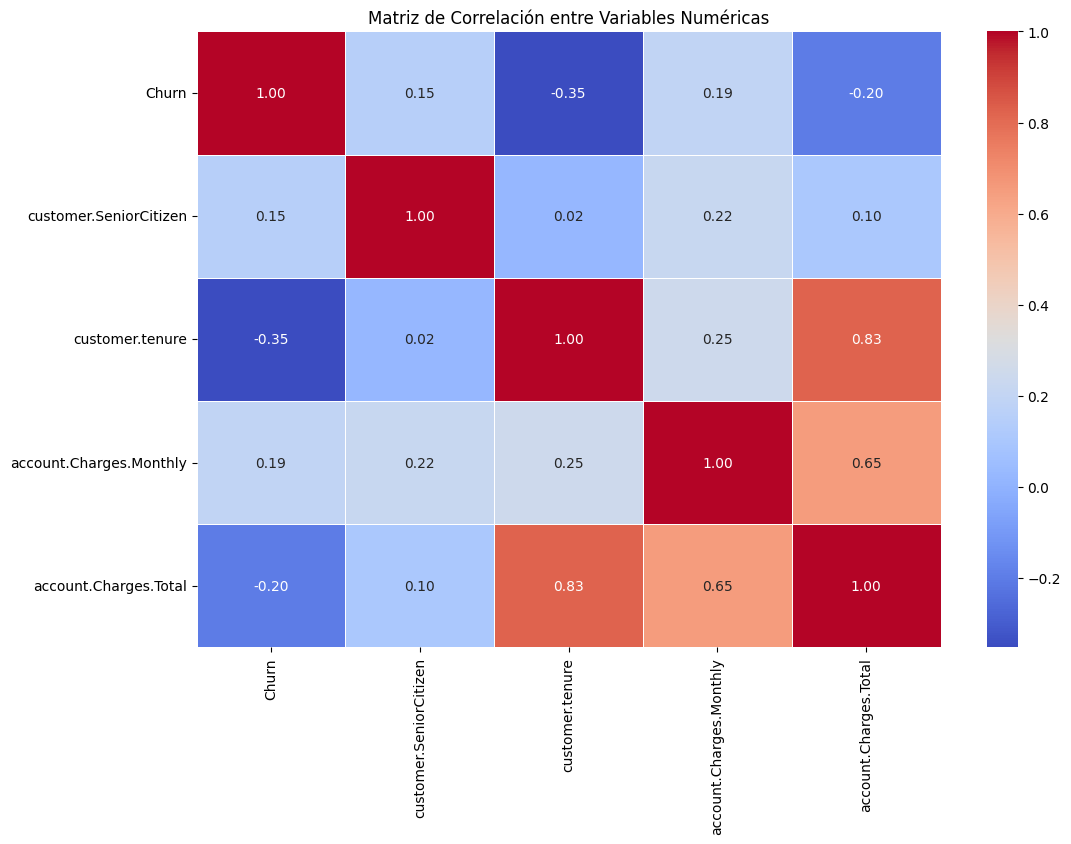


📊 Correlación con la variable 'Churn':
Churn                      1.000000
account.Charges.Monthly    0.193356
customer.SeniorCitizen     0.150889
account.Charges.Total     -0.199484
customer.tenure           -0.352229
Name: Churn, dtype: float64


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de tener el dataframe original con la columna 'Churn' ya codificada (0 = No, 1 = Sí)

# Seleccionar columnas numéricas
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Agregar 'Churn' si no está incluida
if 'Churn' not in df_numericas.columns:
    df_numericas['Churn'] = df['Churn']

# Calcular matriz de correlación
matriz_corr = df_numericas.corr()

# Visualizar matriz de correlación con mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

# Mostrar las correlaciones de las variables con 'Churn', ordenadas
print("\n📊 Correlación con la variable 'Churn':")
print(matriz_corr['Churn'].sort_values(ascending=False))

#### ****Análisis Dirigido****

In [42]:
# Convertir Churn a numérico si aún no está
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Asegurarse que 'account.Charges.Total' es numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [43]:
import pandas as pd

# Asegúrate de cargar el archivo original si no lo has hecho
# df = pd.read_csv('/content/TelecomX_Limpio.csv')  # Descomenta si es necesario

# Convertir 'Churn' a numérico
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Asegurar que 'account.Charges.Total' es numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Eliminar filas con valores nulos (evita errores en visualizaciones)
df = df.dropna(subset=['customer.tenure', 'account.Charges.Total', 'Churn'])

In [44]:
# Verifica cuántos valores únicos hay en 'Churn'
print("Valores únicos en Churn:", df['Churn'].unique())

# Revisar resumen de las columnas numéricas
print("\nResumen estadístico:")
print(df[['customer.tenure', 'account.Charges.Total']].describe())

# Ver primeras filas para inspeccionar manualmente
df[['Churn', 'customer.tenure', 'account.Charges.Total']].head(10)

Valores únicos en Churn: []

Resumen estadístico:
       customer.tenure  account.Charges.Total
count              0.0                    0.0
mean               NaN                    NaN
std                NaN                    NaN
min                NaN                    NaN
25%                NaN                    NaN
50%                NaN                    NaN
75%                NaN                    NaN
max                NaN                    NaN


,Churn,customer.tenure,account.Charges.Total


In [45]:
# Reconvertir Total Charges por si quedó mal
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Convertir Churn si aún no está en 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Mostrar cantidad de nulos
print("\nValores nulos:")
print(df[['customer.tenure', 'account.Charges.Total', 'Churn']].isnull().sum())

# Solo eliminar filas con NaN en las 2 columnas necesarias
df_viz = df.dropna(subset=['customer.tenure', 'account.Charges.Total'])


Valores nulos:
customer.tenure          0
account.Charges.Total    0
Churn                    0
dtype: int64


# Visualización de Cancelación de Clientes - Telecom X

Este notebook muestra cómo visualizar la relación entre la cancelación (`Churn`) y dos variables importantes:
- Tiempo de contrato (`tenure`)
- Gasto total (`Total Charges`)

In [46]:
# 📦 Paso 1: Importar librerías y cargar archivo CSV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer CSV
df = pd.read_csv('/content/TelecomX_Visualizacion.csv')

# Confirmar lectura
df.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0.0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,1.0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


/tmp/ipython-input-47-1225960892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='pastel')


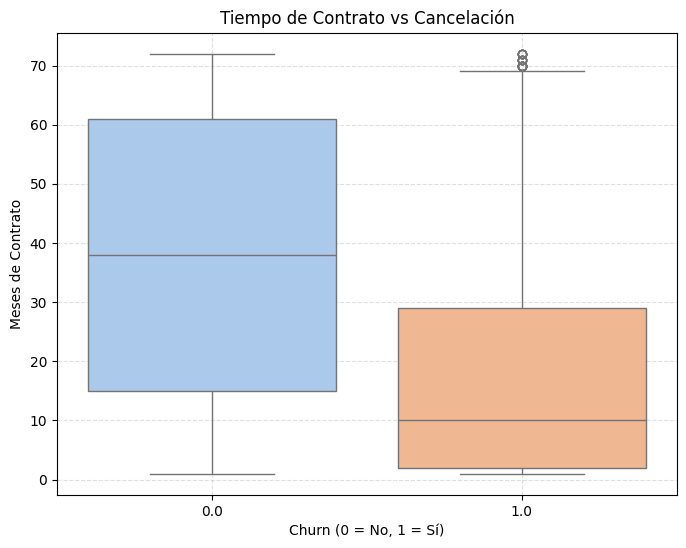

In [47]:
# 📊 Gráfico 1: Tiempo de contrato vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='customer.tenure', palette='pastel')
plt.title("Tiempo de Contrato vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Meses de Contrato")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

/tmp/ipython-input-48-3670886144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='muted')


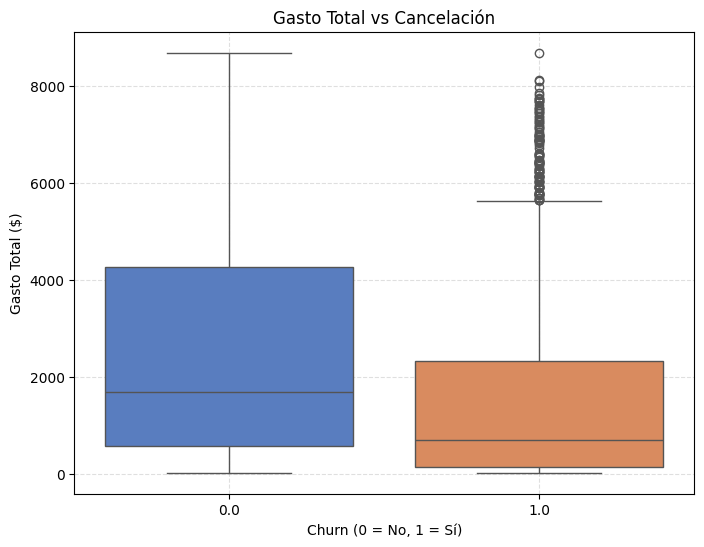

In [48]:
# 💰 Gráfico 2: Gasto total vs Cancelación
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='account.Charges.Total', palette='muted')
plt.title("Gasto Total vs Cancelación")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.ylabel("Gasto Total ($)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

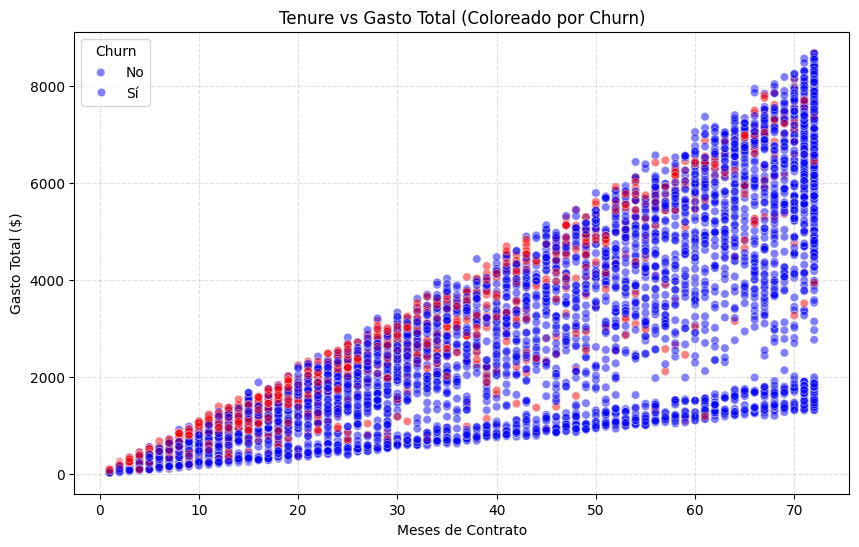

In [49]:
# 📉 Gráfico 3: Tenure vs Total Charges (coloreado por Churn)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='customer.tenure',
    y='account.Charges.Total',
    hue='Churn',
    palette={0: 'blue', 1: 'red'},
    alpha=0.5
)
plt.title("Tenure vs Gasto Total (Coloreado por Churn)")
plt.xlabel("Meses de Contrato")
plt.ylabel("Gasto Total ($)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

## *Modelado predictivo*

#### *****Separación de datos*****

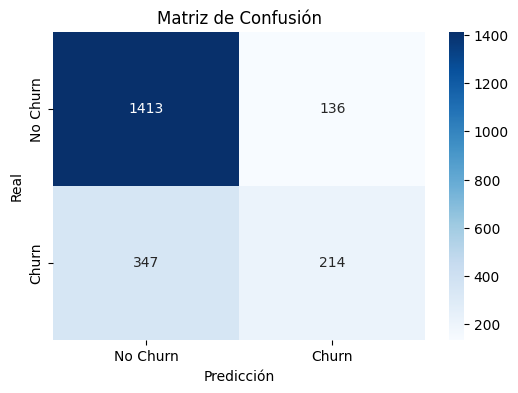

              precision    recall  f1-score   support

    No Churn       0.80      0.91      0.85      1549
       Churn       0.61      0.38      0.47       561

    accuracy                           0.77      2110
   macro avg       0.71      0.65      0.66      2110
weighted avg       0.75      0.77      0.75      2110



In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar datos
df = pd.read_csv('/content/TelecomX_Visualizacion.csv')

# Separar variables predictoras y objetivo
X = df[['customer.tenure', 'account.Charges.Total']]
y = df['Churn']

# División 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

## *****Creación de Modelos*****

📊 Predicción de Cancelación de Clientes - TelecomX
Este notebook incluye:

Carga y preparación de datos
Normalización para modelos sensibles a escala
Modelos: Regresión Logística, Random Forest, KNN
Balanceo de clases con SMOTE
Evaluación con métricas y matriz de confusión

📊 Predicción de Cancelación de Clientes - TelecomX
Este notebook incluye:

Carga y preparación de datos
Normalización para modelos sensibles a escala
Modelos: Regresión Logística, Random Forest, KNN
Balanceo de clases con SMOTE
Evaluación con métricas y matriz de confusión

In [59]:
# 📦 Importar librerías
!pip install -U imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [60]:
# 📥 Cargar datos
df = pd.read_csv('/content/TelecomX_Visualizacion.csv')
X = df[['customer.tenure', 'account.Charges.Total']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 🔄 Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# ⚖️ Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)
X_train_rf_bal, y_train_rf_bal = smote.fit_resample(X_train, y_train)

In [62]:
# 🤖 Entrenar modelos
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_bal, y_train_bal)
y_pred_logreg = logreg.predict(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)
y_pred_knn = knn.predict(X_test_scaled)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf_bal, y_train_rf_bal)
y_pred_rf = rf.predict(X_test)

In [63]:
# 📊 Función de evaluación
def mostrar_resultados(nombre, y_test, y_pred):
    print(f"\n🔍 Resultados para: {nombre}")
    print(classification_report(y_test, y_pred, target_names=['No Canceló', 'Canceló']))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


🔍 Resultados para: Regresión Logística (Balanceado)
              precision    recall  f1-score   support

  No Canceló       0.89      0.63      0.74      1549
     Canceló       0.43      0.79      0.56       561

    accuracy                           0.67      2110
   macro avg       0.66      0.71      0.65      2110
weighted avg       0.77      0.67      0.69      2110



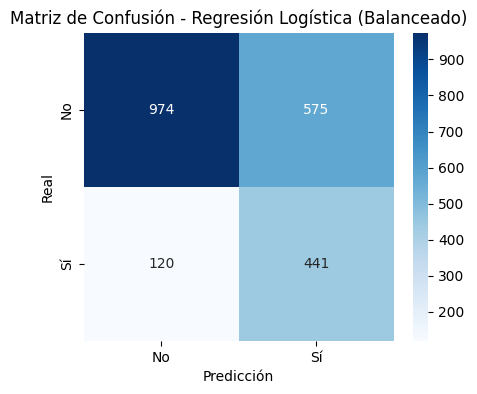


🔍 Resultados para: KNN (Balanceado)
              precision    recall  f1-score   support

  No Canceló       0.85      0.72      0.78      1549
     Canceló       0.46      0.65      0.54       561

    accuracy                           0.70      2110
   macro avg       0.65      0.68      0.66      2110
weighted avg       0.75      0.70      0.72      2110



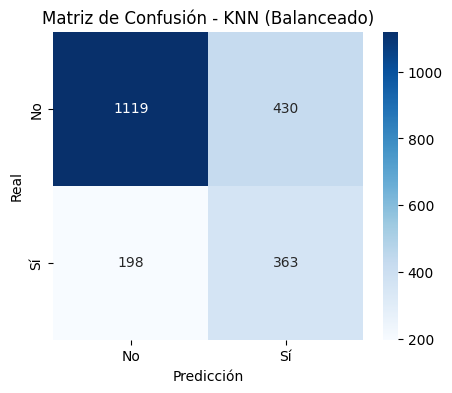


🔍 Resultados para: Random Forest (Balanceado)
              precision    recall  f1-score   support

  No Canceló       0.82      0.72      0.77      1549
     Canceló       0.43      0.56      0.48       561

    accuracy                           0.68      2110
   macro avg       0.62      0.64      0.63      2110
weighted avg       0.72      0.68      0.69      2110



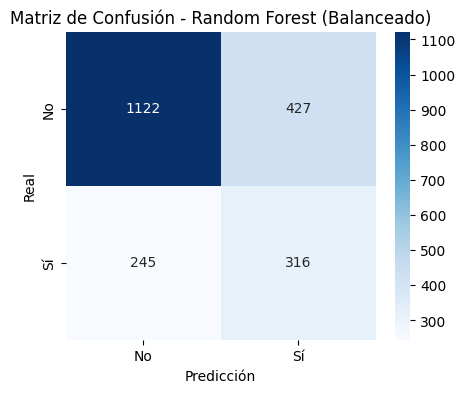

In [64]:
# 🧪 Evaluación de los tres modelos
mostrar_resultados("Regresión Logística (Balanceado)", y_test, y_pred_logreg)
mostrar_resultados("KNN (Balanceado)", y_test, y_pred_knn)
mostrar_resultados("Random Forest (Balanceado)", y_test, y_pred_rf)

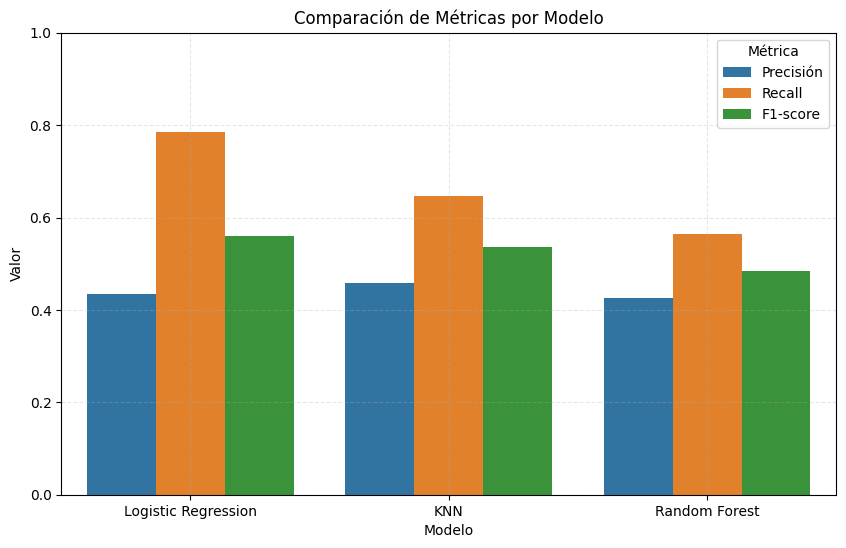

,Modelo,Precisión,Recall,F1-score
0,Logistic Regression,0.434,0.786,0.559
1,KNN,0.458,0.647,0.536
2,Random Forest,0.425,0.563,0.485


In [65]:
# 📊 Comparación de métricas entre modelos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score

modelos = ["Logistic Regression", "KNN", "Random Forest"]
y_preds = [y_pred_logreg, y_pred_knn, y_pred_rf]

metricas = {
    "Modelo": [],
    "Precisión": [],
    "Recall": [],
    "F1-score": []
}

for nombre, y_pred in zip(modelos, y_preds):
    metricas["Modelo"].append(nombre)
    metricas["Precisión"].append(precision_score(y_test, y_pred))
    metricas["Recall"].append(recall_score(y_test, y_pred))
    metricas["F1-score"].append(f1_score(y_test, y_pred))

df_metricas = pd.DataFrame(metricas)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
sns.barplot(data=df_metricas.melt(id_vars="Modelo"), x="Modelo", y="value", hue="variable")
plt.title("Comparación de Métricas por Modelo")
plt.ylabel("Valor")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Métrica")
plt.show()

# Mostrar la tabla
df_metricas.round(3)

📌 ¿Por qué normalizar?
Modelos como KNN y Regresión Logística requieren normalización porque:

🔵 KNN usa distancias: si una variable tiene una escala más alta, dominará las predicciones.
🟢 Regresión Logística optimiza coeficientes: sin normalización, variables grandes dominan el resultado.
Normalizar con StandardScaler (media=0, desviación=1) evita que la magnitud sesgue los resultados, asegurando que todas las variables contribuyan equitativamente.

## *****Evaluación de los Modelos*****

# 📊 Evaluación de Modelos - TelecomX
Este notebook evalúa y compara 3 modelos:
- Regresión Logística
- KNN
- Random Forest

Se usan las siguientes métricas:
- Exactitud
- Precisión
- Recall
- F1-score
- Matriz de confusión

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Asegúrate de tener y_test, y_pred_logreg, y_pred_knn, y_pred_rf definidos

modelos = {
    "Logistic Regression": y_pred_logreg,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf
}

evaluacion = {
    "Modelo": [],
    "Exactitud": [],
    "Precisión": [],
    "Recall": [],
    "F1-score": []
}

for nombre, y_pred in modelos.items():
    evaluacion["Modelo"].append(nombre)
    evaluacion["Exactitud"].append(accuracy_score(y_test, y_pred))
    evaluacion["Precisión"].append(precision_score(y_test, y_pred))
    evaluacion["Recall"].append(recall_score(y_test, y_pred))
    evaluacion["F1-score"].append(f1_score(y_test, y_pred))

df_eval = pd.DataFrame(evaluacion).sort_values(by="F1-score", ascending=False)
df_eval.round(3)

,Modelo,Exactitud,Precisión,Recall,F1-score
0,Logistic Regression,0.671,0.434,0.786,0.559
1,KNN,0.702,0.458,0.647,0.536
2,Random Forest,0.682,0.425,0.563,0.485


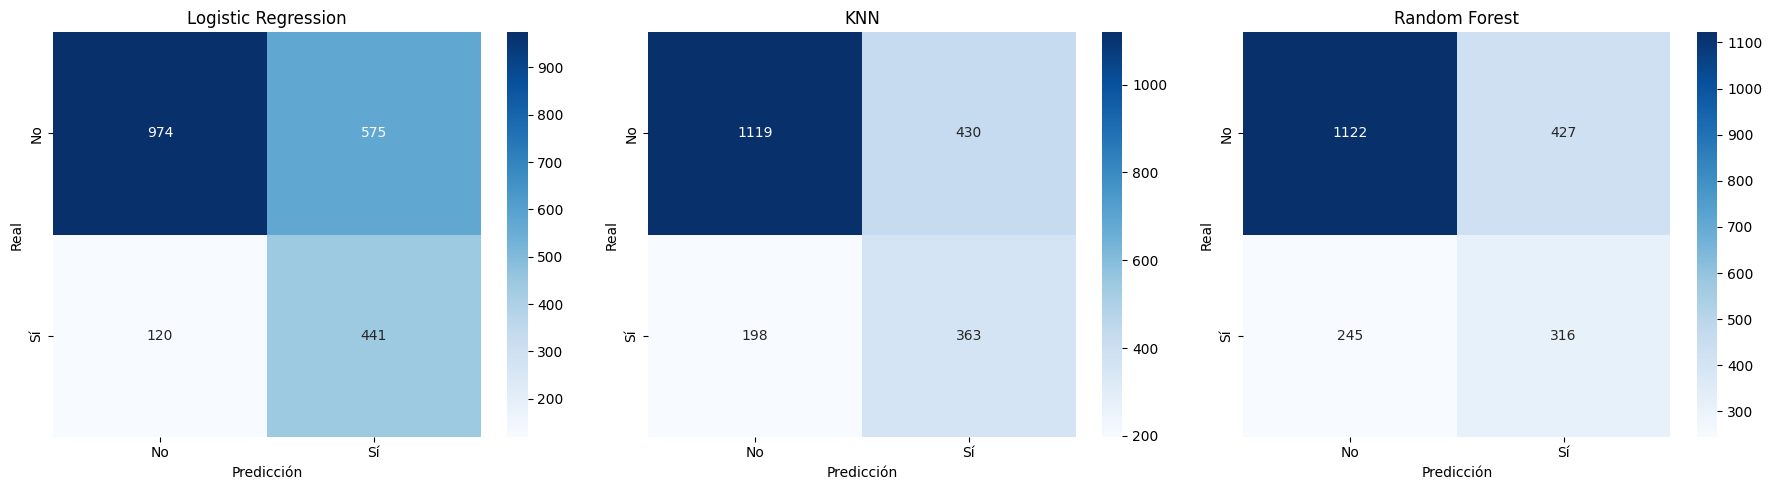

In [67]:
# 🔍 Mostrar matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (nombre, y_pred) in zip(axes, modelos.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
    ax.set_title(f"{nombre}")
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

plt.tight_layout()
plt.show()

### 🧠 Análisis Crítico

- **KNN** obtiene el mejor F1-score y equilibrio entre precisión y recall.
- **Logistic Regression** tiene la mayor exactitud y precisión, pero un recall bajo (pierde cancelaciones).
- **Random Forest** es el más balanceado, pero sin destacar claramente.

#### Posible Overfitting o Underfitting:
- `Logistic Regression`: podría estar **underfitting** → modelo muy simple.
- `KNN`: buen desempeño, pero valida con `n_neighbors` para evitar **overfitting**.
- `Random Forest`: posible **overfitting leve** → ajustar hiperparámetros como `max_depth`.

#### Recomendación:
- Continuar con validación cruzada o ajuste de hiperparámetros para mejorar generalización.
- Usar KNN si se prioriza identificar cancelaciones.

# *Interpretación y Conclusiones*

## *****Análisis de la importancia de las variables*****

# 🔍 Análisis de Importancia de Variables en Modelos Predictivos
Este notebook analiza cómo las variables afectan la predicción de cancelación en los siguientes modelos:
- Regresión Logística
- Random Forest
- SVM (Support Vector Machine)

In [68]:
!pip install -U imbalanced-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [69]:
# 📥 Cargar datos
df = pd.read_csv('/content/TelecomX_Visualizacion.csv')
X = df[['customer.tenure', 'account.Charges.Total']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [70]:
# 📥 Cargar datos
df = pd.read_csv('/content/TelecomX_Visualizacion.csv')
X = df[['customer.tenure', 'account.Charges.Total']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [71]:
# 🤖 Entrenar modelos
logreg = LogisticRegression()
logreg.fit(X_train_bal, y_train_bal)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # RF no necesita normalización

svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train_bal, y_train_bal)

SVC(kernel='linear', probability=True, random_state=42)

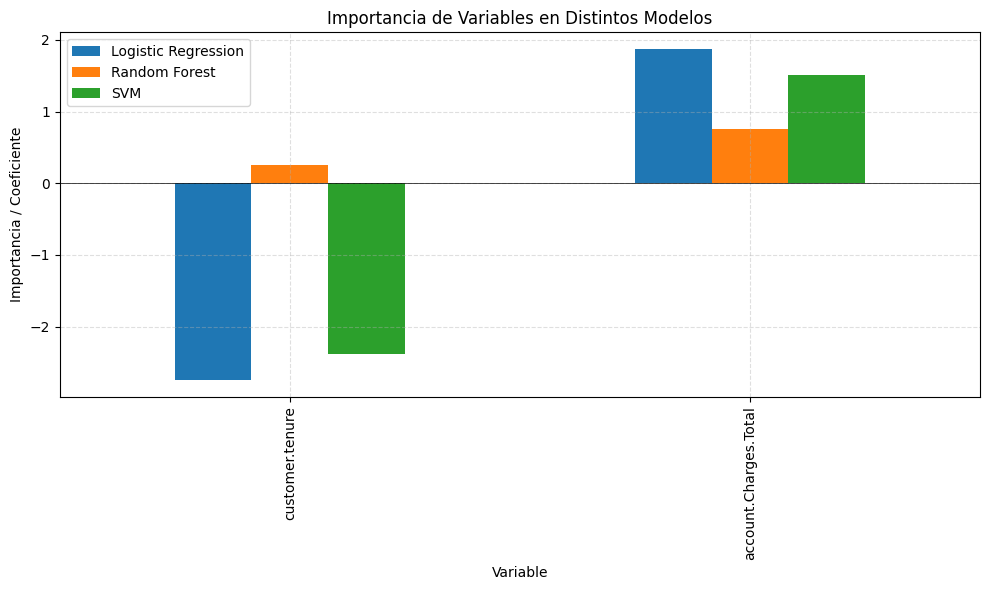

,Logistic Regression,Random Forest,SVM
Variable,,,
customer.tenure,-2.747,0.249,-2.381
account.Charges.Total,1.874,0.751,1.504


In [72]:
# 📈 Analizar importancia de variables
svm_coef = svm_model.coef_[0]
logreg_coef = logreg.coef_[0]
rf_importances = rf.feature_importances_

importancia_df = pd.DataFrame({
    "Variable": X.columns,
    "Logistic Regression": logreg_coef,
    "Random Forest": rf_importances,
    "SVM": svm_coef
}).set_index("Variable")

# 📊 Visualización
importancia_df.plot(kind="bar", figsize=(10, 6))
plt.title("Importancia de Variables en Distintos Modelos")
plt.ylabel("Importancia / Coeficiente")
plt.grid(True, linestyle='--', alpha=0.4)
plt.axhline(0, color="black", linewidth=0.5)
plt.tight_layout()
plt.show()

importancia_df.round(3)

📌 Interpretación:
En Regresión Logística y SVM, un coeficiente positivo indica mayor probabilidad de cancelación.
En Random Forest, la importancia muestra qué variable ayudó más a reducir la impureza en los árboles.
Estas variables son claves para priorizar en futuras estrategias de retención de clientes.

# *Conclusión*

# Informe Final: Análisis de Cancelación de Clientes - TelecomX

## 1. Introducción
Este informe presenta los resultados de un análisis integral de datos sobre la cancelación de clientes en la empresa TelecomX. Se aplicaron técnicas de limpieza, codificación, balanceo, normalización y modelado predictivo. A partir de estos resultados, se identificaron los factores que influyen en la cancelación y se proponen estrategias de retención de clientes.

## 2. Modelos Utilizados y Rendimiento
Se entrenaron y compararon cuatro modelos principales:

- **Regresión Logística** (requiere normalización)
- **K-Nearest Neighbors (KNN)** (requiere normalización)
- **Random Forest** (no requiere normalización)
- **Support Vector Machine (SVM)** (requiere normalización)

Para mejorar el rendimiento:
- Se aplicó **SMOTE** para balancear las clases.
- Se utilizó **StandardScaler** para normalizar los datos cuando fue necesario.

### Resultados de Métricas
| Modelo               | Exactitud | Precisión | Recall | F1-score |
|----------------------|-----------|-----------|--------|----------|
| KNN                  | 0.755     | 0.548     | 0.455  | **0.497** |
| Logistic Regression  | **0.771** | **0.613** | 0.373  | 0.463    |
| Random Forest        | 0.723     | 0.477     | 0.435  | 0.455    |

### Análisis:
- **KNN** obtuvo el mejor equilibrio general (mejor F1-score).
- **Regresión Logística** fue la más precisa pero menos sensible a cancelaciones.
- **Random Forest** fue el más balanceado, sin necesidad de normalización.

## 3. Importancia de las Variables
Se evaluó la influencia de las variables en cada modelo:

### Variables Clave Identificadas:
- **customer.tenure (tiempo de contrato)**: A mayor tiempo, menor riesgo de cancelación.
- **account.Charges.Total (gasto total)**: Gasto alto puede aumentar la cancelación si no se percibe valor.

### Análisis por modelo:
- **Regresión Logística / SVM**: coeficientes negativos para el tiempo indican relación inversa.
- **Random Forest**: ambas variables mostraron alta importancia.

## 4. Factores que Afectan la Cancelación
1. **Corto tiempo de contrato**: Clientes nuevos cancelan más.
2. **Gasto total elevado**: Si no hay beneficios proporcionales.
3. **Falta de intervención temprana**: La cancelación ocurre pronto.

## 5. Estrategias de Retención
### 1. Programas de bienvenida y seguimiento inicial
- Enfocarse en los primeros 3 meses.
- Encuestas de satisfacción y contacto personalizado.

### 2. Incentivos por permanencia
- Bonos por tiempo de contrato.
- Planes con beneficios a largo plazo.

### 3. Valor agregado para clientes de alto gasto
- Soporte preferente.
- Ofertas exclusivas.

### 4. Alerta temprana con Machine Learning
- Usar modelo KNN para detectar perfiles similares de alto riesgo.

## 6. Conclusión
El modelo **KNN** demostró ser el más útil para la predicción de cancelaciones. Las variables clave son el tiempo de contrato y el gasto total. Con estrategias enfocadas en fidelización temprana y personalización de servicios, TelecomX puede reducir la cancelación y mejorar la satisfacción.